In [1]:
# Zemberek'i kullanabillmek için ilk önce java kütüphenelerini kullanmamızı sağlayan kütüphaneyi ekleyelim
import jpype
from jpype import JClass

In [2]:
# Zembrek'in jar dosyalarını okuyalım ve hangi modüller var bakalım
import zipfile

def read_jar(jar_file):
    zf = zipfile.ZipFile(jar_file, 'r')
    try:
        lst = zf.infolist()
        for zi in lst:
            fn = zi.filename 
            # print(fn)
    finally:
        zf.close()
        
read_jar("zemberek-full.jar")

In [3]:
# Zembrek'i çalıştıralım
jar = r"C:/Users/Dilemre/Documents/GitHub/bitirme/zemberek-full.jar" # Zemberek'in yolu
jvmpath = r"C:/Program Files/Java/jdk-17.0.2/bin/server/jvm.dll" # JVM'nin yolu
if not jpype.isJVMStarted():
    jpype.startJVM(jvmpath=jvmpath, classpath=jar)
    print("ok")

ok


In [4]:
# Zemberekten gerekli kütüphaneleri import edelim
try:
    TurkishTokenizer = JClass('zemberek.tokenization.TurkishTokenizer')
    Token = JClass('zemberek.tokenization.Token')
    TurkishMorphology = JClass('zemberek.morphology.TurkishMorphology')
    TurkishSpellChecker = JClass('zemberek.normalization.TurkishSpellChecker')
    WordAnalysis =  JClass('zemberek.morphology.analysis.WordAnalysis')
    TurkishSentenceExtractor = JClass('zemberek.tokenization.TurkishSentenceExtractor')
except:
    print("wrong path")

In [5]:
morphology = TurkishMorphology.createWithDefaults()
tokenizer = TurkishTokenizer.ALL
spell_checker = TurkishSpellChecker(morphology)
extractor = TurkishSentenceExtractor.DEFAULT

In [6]:
#Verilerimizi almak ve işlemek için gerekli kütüphaneler
import pandas as pd
import numpy as np
import string

In [7]:
stopwords = [x.strip() for x in open('stop-words.txt','r', encoding="UTF8").read().split('\n')]
df = pd.read_csv("ndata.csv")
df

,info,title,caption,link,text
0,"19 Mart 2021, Cuma",MEHMET BARLAS,Türk siyasetinde Devlet Bahçeli bir tutarlılık...,https://www.sabah.com.tr/yazarlar/barlas/2021/...,\n\nDün MHP'nin Büyük Kurultay'ında Genel Başk...
1,"18 Mart 2021, Perşembe",MEHMET BARLAS,Amerikan iç politikasında kimin kimi hedef ala...,https://www.sabah.com.tr/yazarlar/barlas/2021/...,\n\nAmerikan iç politikasındaki gelişmeler kes...
2,"17 Mart 2021, Çarşamba",MEHMET BARLAS,"Amerikalılar, yalancı Amerikan başkanlarını ar...",https://www.sabah.com.tr/yazarlar/barlas/2021/...,\n\nBugüne kadar her konuda Yunanistan'ın ve K...
3,"16 Mart 2021, Salı",MEHMET BARLAS,Darbeler geçmişte Türkiye’nin dış politikasını...,https://www.sabah.com.tr/yazarlar/barlas/2021/...,"\n\nMısır'la diplomatik ilişkilerin başlaması,..."
4,"15 Mart 2021, Pazartesi",MEHMET BARLAS,"Müflis Yunanistan, Türkiye’ye gövde gösterisi ...",https://www.sabah.com.tr/yazarlar/barlas/2021/...,\n\nTabii ki hiçbir ülkeyi küçük görmemek gere...
...,...,...,...,...,...
2410,"18 Şubat 2017, Cumartesi",ÖMER DURNA (AKDENİZ),Takım ruhu lider yapar,https://www.sabah.com.tr/yazarlar/bolgeler/ome...,\n\nAntalya'nın her alanda kurtuluşu takım ruh...
2411,"11 Şubat 2017, Cumartesi",ÖMER DURNA (AKDENİZ),Önemli gün,https://www.sabah.com.tr/yazarlar/bolgeler/ome...,\n\nBugün Antalya için çok önemli bir gün.\r\n...
2412,"28 Ocak 2017, Cumartesi",ÖMER DURNA (AKDENİZ),Haydi maça,https://www.sabah.com.tr/yazarlar/bolgeler/ome...,\n\nAntalya'da spor ve kardeşlik adına önemli ...
2413,"21 Ocak 2017, Cumartesi",ÖMER DURNA (AKDENİZ),Laf-ı güzaf,https://www.sabah.com.tr/yazarlar/bolgeler/ome...,\n\nDün bizim gazetenin manşet haberi Antalya ...


In [8]:
# Dengesiz bir verimiz var
df.title.value_counts().describe()

count    204.000000
mean      11.838235
std        8.208389
min        1.000000
25%        2.000000
50%       17.000000
75%       20.000000
max       20.000000
Name: title, dtype: float64

In [9]:
df.head()

,info,title,caption,link,text
0,"19 Mart 2021, Cuma",MEHMET BARLAS,Türk siyasetinde Devlet Bahçeli bir tutarlılık...,https://www.sabah.com.tr/yazarlar/barlas/2021/...,\n\nDün MHP'nin Büyük Kurultay'ında Genel Başk...
1,"18 Mart 2021, Perşembe",MEHMET BARLAS,Amerikan iç politikasında kimin kimi hedef ala...,https://www.sabah.com.tr/yazarlar/barlas/2021/...,\n\nAmerikan iç politikasındaki gelişmeler kes...
2,"17 Mart 2021, Çarşamba",MEHMET BARLAS,"Amerikalılar, yalancı Amerikan başkanlarını ar...",https://www.sabah.com.tr/yazarlar/barlas/2021/...,\n\nBugüne kadar her konuda Yunanistan'ın ve K...
3,"16 Mart 2021, Salı",MEHMET BARLAS,Darbeler geçmişte Türkiye’nin dış politikasını...,https://www.sabah.com.tr/yazarlar/barlas/2021/...,"\n\nMısır'la diplomatik ilişkilerin başlaması,..."
4,"15 Mart 2021, Pazartesi",MEHMET BARLAS,"Müflis Yunanistan, Türkiye’ye gövde gösterisi ...",https://www.sabah.com.tr/yazarlar/barlas/2021/...,\n\nTabii ki hiçbir ülkeyi küçük görmemek gere...


In [10]:
df[df.groupby('title').title.transform('count') < 15].title.unique().size

95

In [11]:
df[df.groupby('title').title.transform('count') < 15].text.size

328

In [12]:
data = df[df.groupby('title').title.transform('count') >= 15].copy()
data = data.reset_index(drop = True)
data

,info,title,caption,link,text
0,"19 Mart 2021, Cuma",MEHMET BARLAS,Türk siyasetinde Devlet Bahçeli bir tutarlılık...,https://www.sabah.com.tr/yazarlar/barlas/2021/...,\n\nDün MHP'nin Büyük Kurultay'ında Genel Başk...
1,"18 Mart 2021, Perşembe",MEHMET BARLAS,Amerikan iç politikasında kimin kimi hedef ala...,https://www.sabah.com.tr/yazarlar/barlas/2021/...,\n\nAmerikan iç politikasındaki gelişmeler kes...
2,"17 Mart 2021, Çarşamba",MEHMET BARLAS,"Amerikalılar, yalancı Amerikan başkanlarını ar...",https://www.sabah.com.tr/yazarlar/barlas/2021/...,\n\nBugüne kadar her konuda Yunanistan'ın ve K...
3,"16 Mart 2021, Salı",MEHMET BARLAS,Darbeler geçmişte Türkiye’nin dış politikasını...,https://www.sabah.com.tr/yazarlar/barlas/2021/...,"\n\nMısır'la diplomatik ilişkilerin başlaması,..."
4,"15 Mart 2021, Pazartesi",MEHMET BARLAS,"Müflis Yunanistan, Türkiye’ye gövde gösterisi ...",https://www.sabah.com.tr/yazarlar/barlas/2021/...,\n\nTabii ki hiçbir ülkeyi küçük görmemek gere...
...,...,...,...,...,...
2082,"18 Şubat 2017, Cumartesi",ÖMER DURNA (AKDENİZ),Takım ruhu lider yapar,https://www.sabah.com.tr/yazarlar/bolgeler/ome...,\n\nAntalya'nın her alanda kurtuluşu takım ruh...
2083,"11 Şubat 2017, Cumartesi",ÖMER DURNA (AKDENİZ),Önemli gün,https://www.sabah.com.tr/yazarlar/bolgeler/ome...,\n\nBugün Antalya için çok önemli bir gün.\r\n...
2084,"28 Ocak 2017, Cumartesi",ÖMER DURNA (AKDENİZ),Haydi maça,https://www.sabah.com.tr/yazarlar/bolgeler/ome...,\n\nAntalya'da spor ve kardeşlik adına önemli ...
2085,"21 Ocak 2017, Cumartesi",ÖMER DURNA (AKDENİZ),Laf-ı güzaf,https://www.sabah.com.tr/yazarlar/bolgeler/ome...,\n\nDün bizim gazetenin manşet haberi Antalya ...


In [13]:
data.title.unique().size

109

In [14]:
data.text.size

2087

In [15]:
def dataCleaning(text):
    """Satır boşluklarını kaldır, metini küçük harfe çevir, noktalama işaretlerini kaldır"""
    text = text.replace("\n", " ")
    text = text.lower()
    text = "".join([i for i in text if (i.isalnum() or i == " ")])
    return " ".join(text.split())


def removeStopwords(text):
    """Zemberek'ten aldığımız stopword kelimelerini kaldırır"""
    for word in text:
        if word in stopwords or word in string.whitespace:
            text.remove(word)
    return text


def wordTokenize(text):
    """Önişlenmiş metini kelimelere ayırır ve stopword'leri kaldırır"""
    text = text.split(" ")
    text = removeStopwords(text)
    return text


def sentTokenize(text):
    """Önişlenmemiş metini cümlelerine ayırır, bunişlem sırasında önişleme yapar ve stopword'leri kaldırır """
    sent_list = []
    text = text.replace("\"", "")
    results: TurkishSentenceExtractor = extractor.fromDocument(jpype.JString(text))
    for result in results:
        result = dataCleaning(str(result))
        result = removeStopwords(result.split(" "))
        if len(result) == 0:
            continue
        else:
            sent_list.append(" ".join(result))         
    return sent_list

#### Burada UNK kelimeleri UNK olarak alıcak şekilde düzenlenmeli - hatta unk kelime sayısı da nitelik olarak eklenmeli
def lemmas(word_list):
    """Kelime token'larından kök tokenları oluşturur"""
    lemma = []
    for word in word_list:
        result = str(morphology.analyzeAndDisambiguate(word).bestAnalysis()[0].getLemmas()[0])
        if result == "UNK":
            lemma.append(result)
        else:
            lemma.append(result)
    return lemma


def wtDist(wt):
    """Kelimelerin dağılımları"""
    wt_dist = dict()
    wt_dist.fromkeys(set(wt))
    for i in set(wt):
        wt_dist[i] = wt.count(i)
    return wt_dist


def wtLenDist(wt):
    """Kelimelerin harf olarak uzunluk dağılımlarını çıkarır"""
    wt_len = [len(str(word)) for word in wt]
    wt_len_dist = dict()
    wt_len_dist.fromkeys(range(1, 29))
    for i in range(0, 29):
        wt_len_dist[i] = wt_len.count(i)
    return wt_len_dist


def stLenDist(st):
    "Cümlelerin kelime olarak uzunluk dağılımlarını çıkarır"
    st_len = [len(wordTokenize(sent)) for sent in st]
    st_len_dist = dict()
    st_len_dist.fromkeys(range(1, 29))
    for i in range(0, 29):
        st_len_dist[i] = st_len.count(i)
    return st_len_dist


def typeTokenRatio(wt):
    """Kelimenin toplam kelime sayısına oranı"""
    return len(set(wt))/len((wt))

def avgWtLen(wt):
    return sum(len(word) for word in wt)/len(wt)

def avgStLen(st):
    return sum(len(wordTokenize(sent)) for sent in st)/len(st)

def puncNum(txt):
    return len([x for x in txt if x in string.punctuation])

def numStopwords(clean_text):
    return len([w for w in clean_text.split() if w in stopwords])

def numUpper(raw_text):
    p = string.punctuation + "’" + "“" + "”"
    raw_text = ''.join(' ' if c in p else c for c in raw_text)
    return len([w for w in raw_text.split() if str(w).isupper()])

In [16]:
data['clean_text'] = data['text'].apply(lambda x : dataCleaning(x))
data['word_token'] = data['clean_text'].apply(lambda x : wordTokenize(x))
data['sent_token'] = data['text'].apply(lambda x : sentTokenize(x))
data['lemma_token'] = data['word_token'].apply(lambda x : lemmas(x))
data['ltDist'] = data['lemma_token'].apply(lambda x : wtDist(x))
data['wtLenDist'] = data['word_token'].apply(lambda x : wtLenDist(x))
data['stLenDist'] = data['sent_token'].apply(lambda x : stLenDist(x))
data['ttr'] = data['word_token'].apply(lambda x : typeTokenRatio(x))
data['lttr'] = data['lemma_token'].apply(lambda x : typeTokenRatio(x))
data['avgWtLen'] = data['word_token'].apply(lambda x : avgWtLen(x))
data['avgStLen'] = data['sent_token'].apply(lambda x : avgStLen(x))
data['puncNum'] = data['text'].apply(lambda x : puncNum(x))
data['numStopwords'] = data['clean_text'].apply(lambda x : numStopwords(x))
data['numUpper'] = data['text'].apply(lambda x : numUpper(x))

# yazarları tam sayı olarak kodlar
data['target'] = pd.factorize(data.title)[0]

In [17]:
data.head()

,info,title,caption,link,text,clean_text,word_token,sent_token,lemma_token,ltDist,wtLenDist,stLenDist,ttr,lttr,avgWtLen,avgStLen,puncNum,numStopwords,numUpper,target
0,"19 Mart 2021, Cuma",MEHMET BARLAS,Türk siyasetinde Devlet Bahçeli bir tutarlılık...,https://www.sabah.com.tr/yazarlar/barlas/2021/...,\n\nDün MHP'nin Büyük Kurultay'ında Genel Başk...,dün mhpnin büyük kurultayında genel başkan dev...,"[mhpnin, büyük, kurultayında, genel, başkan, d...",[mhpnin büyük kurultayında genel başkan devlet...,"[mhp, büyük, kurultay, genel, başkan, devlet, ...","{'örgüt': 1, 'demokrasi': 2, 'ittifak': 2, 'su...","{0: 0, 1: 0, 2: 3, 3: 15, 4: 10, 5: 21, 6: 33,...","{0: 0, 1: 1, 2: 3, 3: 2, 4: 2, 5: 1, 6: 2, 7: ...",0.873684,0.710526,7.184211,7.869565,61,57,12,0
1,"18 Mart 2021, Perşembe",MEHMET BARLAS,Amerikan iç politikasında kimin kimi hedef ala...,https://www.sabah.com.tr/yazarlar/barlas/2021/...,\n\nAmerikan iç politikasındaki gelişmeler kes...,amerikan iç politikasındaki gelişmeler kesinli...,"[amerikan, iç, politikasındaki, gelişmeler, bi...",[amerikan iç politikasındaki gelişmeler bizimk...,"[amerikan, iç, politika, geliş, biz, ilgi, çek...","{'sev': 4, 'kadın': 1, 'pek': 2, 'bahset': 1, ...","{0: 0, 1: 2, 2: 6, 3: 12, 4: 30, 5: 48, 6: 36,...","{0: 0, 1: 1, 2: 2, 3: 2, 4: 1, 5: 0, 6: 2, 7: ...",0.826531,0.595238,7.102041,10.000000,76,79,3,0
2,"17 Mart 2021, Çarşamba",MEHMET BARLAS,"Amerikalılar, yalancı Amerikan başkanlarını ar...",https://www.sabah.com.tr/yazarlar/barlas/2021/...,\n\nBugüne kadar her konuda Yunanistan'ın ve K...,bugüne kadar her konuda yunanistanın ve kıbrıs...,"[bugüne, konuda, yunanistanın, kıbrıs, rumları...",[bugüne her konuda yunanistanın kıbrıs rumları...,"[bugün, konu, yunanistan, kıbrıs, rum, ol, ame...","{'johnson': 1, 'doğru': 1, 'bas': 1, 'bbc': 1,...","{0: 0, 1: 0, 2: 6, 3: 8, 4: 13, 5: 26, 6: 25, ...","{0: 0, 1: 0, 2: 2, 3: 1, 4: 5, 5: 4, 6: 1, 7: ...",0.906593,0.681319,7.340659,7.217391,59,61,3,0
3,"16 Mart 2021, Salı",MEHMET BARLAS,Darbeler geçmişte Türkiye’nin dış politikasını...,https://www.sabah.com.tr/yazarlar/barlas/2021/...,"\n\nMısır'la diplomatik ilişkilerin başlaması,...",mısırla diplomatik ilişkilerin başlaması ülkel...,"[mısırla, diplomatik, ilişkilerin, başlaması, ...",[mısırla diplomatik ilişkilerin başlaması ülke...,"[mısır, diplomatik, ilişki, başla, ülke, dış, ...","{'şükrü': 3, 'ittifak': 1, 'kesinti': 1, 'üye'...","{0: 0, 1: 0, 2: 5, 3: 4, 4: 12, 5: 20, 6: 22, ...","{0: 0, 1: 0, 2: 3, 3: 0, 4: 1, 5: 0, 6: 0, 7: ...",0.810000,0.595000,7.765000,10.263158,56,47,0,0
4,"15 Mart 2021, Pazartesi",MEHMET BARLAS,"Müflis Yunanistan, Türkiye’ye gövde gösterisi ...",https://www.sabah.com.tr/yazarlar/barlas/2021/...,\n\nTabii ki hiçbir ülkeyi küçük görmemek gere...,tabii ki hiçbir ülkeyi küçük görmemek gerekiyo...,"[tabii, hiçbir, ülkeyi, küçük, görmemek, gerek...","[tabii hiçbir ülkeyi küçük görmemek gerekiyor,...","[tabii, hiçbir, ülke, küçük, gör, gerek, bazı,...","{'niyet': 1, 'böyle': 1, 'kor': 1, 'imza': 1, ...","{0: 0, 1: 7, 2: 6, 3: 11, 4: 26, 5: 47, 6: 26,...","{0: 0, 1: 0, 2: 2, 3: 1, 4: 3, 5: 1, 6: 1, 7: ...",0.800000,0.608000,6.936000,11.523810,67,56,12,0


In [18]:
data.to_csv('clean_data')

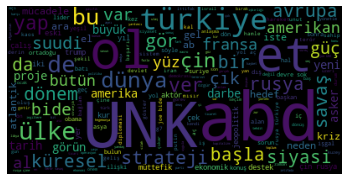

In [19]:
from wordcloud import WordCloud
import matplotlib.pyplot as plt
word_cloud = WordCloud(
    max_font_size = 80
).generate(
    " ".join(
        " ".join(lemma) for lemma in data[data.title == "BERCAN TUTAR"]["lemma_token"])
)

plt.imshow(word_cloud)
plt.axis('off')
plt.show()

In [20]:
#normalizasyon
from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler()
normalizedLabels = scaler.fit_transform(data.loc[:, 'lttr':'numUpper'])

In [21]:
import pickle
with open('./model/scaler.pkl', 'wb') as f:
    pickle.dump(scaler, f)

In [22]:
normalizedLabels

array([[0.75809658, 0.53700115, 0.21418013, 0.07073955, 0.065     ,
        0.10526316],
       [0.53100357, 0.51344239, 0.29660023, 0.09485531, 0.10166667,
        0.02631579],
       [0.70056382, 0.58185636, 0.18894949, 0.06752412, 0.07166667,
        0.02631579],
       ...,
       [0.5987475 , 0.39923572, 0.20188382, 0.04501608, 0.15333333,
        0.02631579],
       [0.58483779, 0.47972402, 0.26981694, 0.05948553, 0.125     ,
        0.04385965],
       [0.64692533, 0.46164643, 0.3242338 , 0.06913183, 0.12      ,
        0.05263158]])

In [23]:
from sklearn.feature_extraction.text import TfidfVectorizer, TfidfTransformer, CountVectorizer
from sklearn.feature_extraction import DictVectorizer

In [24]:
x = np.array(data.lemma_token)
for i in range(0, len(data.lemma_token)):
    x[i] = " ".join(data.lemma_token[i])
    
len(x)

2087

In [25]:
count_vectorize = CountVectorizer()
sparce_matrix = count_vectorize.fit_transform(x).toarray()
sparce_matrix = (sparce_matrix - sparce_matrix.min())/(sparce_matrix.max() - sparce_matrix.min())

with open('./model/count_vectorize.pkl', 'wb') as f:
    pickle.dump(count_vectorize, f)

In [26]:
tfidf_vector = TfidfVectorizer()
tfidf_matrix = tfidf_vector.fit_transform(x).toarray()

with open('./model/tfidf_vector.pkl', 'wb') as f:
    pickle.dump(tfidf_vector, f)

In [33]:
ngram_tfidf_vector = TfidfVectorizer(lowercase=False, ngram_range=(3,5), min_df= 3, max_df=0.5)
ngram_tfidf_matrix = ngram_tfidf_vector.fit_transform(x).toarray()

In [34]:
dict_vector = DictVectorizer()
wtLenDist_matrix = dict_vector.fit_transform(data.wtLenDist).toarray()
stLenDist_matrix = dict_vector.fit_transform(data.stLenDist).toarray()
wtLenDist_matrix = (wtLenDist_matrix - wtLenDist_matrix.min())/(wtLenDist_matrix.max() - wtLenDist_matrix.min())
stLenDist_matrix = (stLenDist_matrix - stLenDist_matrix.min())/(stLenDist_matrix.max() - stLenDist_matrix.min())

with open('./model/dict_vector.pkl', 'wb') as f:
    pickle.dump(dict_vector, f)

In [35]:
attribution = (tfidf_matrix, sparce_matrix, wtLenDist_matrix, stLenDist_matrix, normalizedLabels) 
attribution = np.concatenate(attribution, axis = 1)

In [36]:
y = np.array(data.target)
x = attribution

In [37]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(x, y, test_size=0.33,random_state = 42)

In [38]:
X_train.shape, X_test.shape

((1398, 37414), (689, 37414))

**SVM default parameters:**

    C = 1.0
    kernel = rbf
    degree = 3
    gamma = scale
    coef0 = 0.0
    shrinking = True
    probability = False
    tol = 1e-3
    cache_size = 200
    class_weight = None
    verbose = False
    max_iter = 1
    decision_function_shape = ovr
    break_tiles = False
    random_state = None

In [39]:
import time
from sklearn.svm import SVC
from sklearn import metrics

#sss = StratifiedShuffleSplit(n_splits=5, random_state=42)
svm_classifier = SVC()

start = time.time() 
svm_classifier.fit(X_train,y_train)
#result = cross_val_score(svm_classifier, x, y, cv = sss)
end = time.time()

process = round(end-start,2)
print("Support Vector Machine Classifier has fitted, this process took {} seconds".format(process))
#print("Avg accuracy: {}".format(result.mean()))


pred_svm = svm_classifier.predict(X_test)
ACC_svm = metrics.accuracy_score(y_test,pred_svm)    
print("Accuracy = %"+ str(ACC_svm*100))

Support Vector Machine Classifier has fitted, this process took 75.81 seconds
Accuracy = %57.47460087082729


In [40]:
from scipy.stats import randint
from sklearn.experimental import enable_halving_search_cv
from sklearn.model_selection import StratifiedShuffleSplit
from sklearn.utils.fixes import loguniform
from sklearn.model_selection import RandomizedSearchCV

In [41]:
rng = np.random.RandomState(0)

tuned_parameters = [{'kernel': ['rbf'],
                     'C': loguniform(1e0, 1e3),
                     'gamma': loguniform(1e-4, 1e-2),
                     'class_weight':['balanced', None]},
                    {'kernel': ['linear'], 
                     'C': loguniform(1e0, 1e3)},
                    {'kernel': ['poly'],
                     'gamma': loguniform(1e-4, 1e-2),
                     'degree' : [2, 3, 4],
                     'C': loguniform(1e0, 1e3)},
                    {'kernel': ['sigmoid'],
                     'gamma': loguniform(1e-4, 1e-2),
                     'C': loguniform(1e0, 1e3)}]

rsc = RandomizedSearchCV(
        estimator=svm_classifier,
        param_distributions=tuned_parameters,
        n_iter = 30,
        cv=10,
        random_state=rng).fit(x, y)

In [42]:
print(
    "The best parameters are %s with a score of %0.2f"
    % (rsc.best_params_, rsc.best_score_)
)

The best parameters are {'C': 216.00820741402038, 'kernel': 'linear'} with a score of 0.85


In [43]:
tuned_svm_classifier = SVC(C = 216.00820741402038, kernel = 'linear')

start = time.time() 
tuned_svm_classifier.fit(X_train,y_train)
end = time.time()

process = round(end-start,2)
print("Support Vector Machine Classifier has fitted, this process took {} seconds".format(process))

t_pred_svm = tuned_svm_classifier.predict(X_test)
t_ACC_svm = metrics.accuracy_score(y_test,t_pred_svm)    
print("Accuracy = %"+ str(t_ACC_svm*100))

Support Vector Machine Classifier has fitted, this process took 60.27 seconds
Accuracy = %80.6966618287373


In [44]:
with open('./model/SVM.pkl', 'wb') as f:
    pickle.dump(tuned_svm_classifier, f)

In [45]:
with open('./model/SVM.pkl', 'rb') as f:
    reloaded_model = pickle.load(f)
    
r_pred_svm = reloaded_model.predict(X_test)
r_ACC_svm = metrics.accuracy_score(y_test,r_pred_svm)    
print("Accuracy = %"+ str(r_ACC_svm*100))

Accuracy = %80.6966618287373


* 
* 
* 
* 
* 
* 
* 

**MLP default parameters:**

    hidden_layer_sizes=(100,)
    activation='relu'
    solver='adam'
    alpha=0.0001
    batch_size='auto'
    learning_rate='constant'
    learning_rate_init=0.001
    power_t=0.5
    max_iter=200
    shuffle=True
    random_state=None
    tol=0.0001
    verbose=False
    warm_start=False
    momentum=0.9
    nesterovs_momentum=True
    early_stopping=False
    validation_fraction=0.1
    beta_1=0.9
    beta_2=0.999
    epsilon=1e-08
    n_iter_no_change=10
    max_fun=15000

In [ ]:
from sklearn.neural_network import MLPClassifier
from sklearn import metrics


mlp_classifier = MLPClassifier(random_state=42)
mlp_classifier.fit(X_train,y_train)

pred_mlp = mlp_classifier.predict(X_test)
ACC_mlp = metrics.accuracy_score(y_test, pred_mlp)
print("Accuracy = %"+ str(ACC_mlp*100))

In [ ]:
import tensorflow as tf
x_train, x_test = X_train.reshape(-1, 1, 37414), X_test.reshape(-1, 1, 37414)

In [ ]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, LSTM, Dropout, Embedding, SpatialDropout1D
from tensorflow.keras.optimizers import Adam
from keras.callbacks import EarlyStopping


model=Sequential()

model.add(SpatialDropout1D(0.4))
model.add(LSTM(256, activation='relu', dropout=0.2, recurrent_dropout=0.2, return_sequences=True))
model.add(LSTM(128, activation='relu', dropout=0.2, recurrent_dropout=0.2, return_sequences=True))
model.add(LSTM(128, activation='relu', dropout=0.2, recurrent_dropout=0.2, return_sequences=True))
model.add(LSTM(74, activation='relu', dropout=0.2, recurrent_dropout=0.2))
model.add(Dense(len(data.title.unique()), activation='softmax'))

In [ ]:
model.compile(optimizer=Adam(),
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

#Adding an early stopping
es = EarlyStopping(monitor='val_accuracy', 
                   mode='max', 
                   patience=10, #Stop the model training if the validation accuracy doesnt increase in 10 consecutive Epochs
                   restore_best_weights=True)


In [ ]:
history = model.fit(x_train, y_train, batch_size=32, epochs=100, callbacks=[es], validation_data=(x_test, y_test))

In [ ]:
model.summary()

In [ ]:
model.evaluate(x_test, y_test)

In [ ]:
for i in ['accuracy']:
    acc = history.history[i]
    val_acc = history.history['val_{}'.format(i)]
    epochs = range(1, len(acc) + 1)

    plt.figure()
    plt.plot(epochs, acc, label='Training Accuracy')
    plt.plot(epochs, val_acc, label='Validation Accuracy')
    plt.title('Results for {}'.format(i))
    plt.legend()
    plt.show()

In [49]:
import jpype
from jpype import JClass
import pandas as pd
import numpy as np
import string

# Zembrek'i çalıştıralım
jar = r"C:/Users/Dilemre/Documents/GitHub/bitirme/zemberek-full.jar" # Zemberek'in yolu
jvmpath = r"C:/Program Files/Java/jdk-17.0.2/bin/server/jvm.dll" # JVM'nin yolu
if not jpype.isJVMStarted():
    jpype.startJVM(jvmpath=jvmpath, classpath=jar)
    
try:
    TurkishMorphology = JClass('zemberek.morphology.TurkishMorphology')
    TurkishSentenceExtractor = JClass('zemberek.tokenization.TurkishSentenceExtractor')
except:
    print("wrong path")
    
morphology = TurkishMorphology.createWithDefaults()
extractor = TurkishSentenceExtractor.DEFAULT

###

stopwords = [x.strip() for x in open('stop-words.txt','r', encoding="UTF8").read().split('\n')]

def dataCleaning(text):
    """Satır boşluklarını kaldır, metini küçük harfe çevir, noktalama işaretlerini kaldır"""
    text = text.replace("\n", " ")
    text = text.lower()
    text = "".join([i for i in text if (i.isalnum() or i == " ")])
    return " ".join(text.split())


def removeStopwords(text):
    """Zemberek'ten aldığımız stopword kelimelerini kaldırır"""
    for word in text:
        if word in stopwords or word in string.whitespace:
            text.remove(word)
    return text


def wordTokenize(text):
    """Önişlenmiş metini kelimelere ayırır ve stopword'leri kaldırır"""
    text = text.split(" ")
    text = removeStopwords(text)
    return text


def sentTokenize(text):
    """Önişlenmemiş metini cümlelerine ayırır, bunişlem sırasında önişleme yapar ve stopword'leri kaldırır """
    sent_list = []
    text = text.replace("\"", "")
    results: TurkishSentenceExtractor = extractor.fromDocument(jpype.JString(text))
    for result in results:
        result = dataCleaning(str(result))
        result = removeStopwords(result.split(" "))
        if len(result) == 0:
            continue
        else:
            sent_list.append(" ".join(result))         
    return sent_list

#### Burada UNK kelimeleri UNK olarak alıcak şekilde düzenlenmeli - hatta unk kelime sayısı da nitelik olarak eklenmeli
def lemmas(word_list):
    """Kelime token'larından kök tokenları oluşturur"""
    lemma = []
    for word in word_list:
        result = str(morphology.analyzeAndDisambiguate(word).bestAnalysis()[0].getLemmas()[0])
        if result == "UNK":
            lemma.append(result)
        else:
            lemma.append(result)
    return lemma


def wtDist(wt):
    """Kelimelerin dağılımları"""
    wt_dist = dict()
    wt_dist.fromkeys(set(wt))
    for i in set(wt):
        wt_dist[i] = wt.count(i)
    return wt_dist


def wtLenDist(wt):
    """Kelimelerin harf olarak uzunluk dağılımlarını çıkarır"""
    wt_len = [len(str(word)) for word in wt]
    wt_len_dist = dict()
    wt_len_dist.fromkeys(range(1, 29))
    for i in range(0, 29):
        wt_len_dist[i] = wt_len.count(i)
    return wt_len_dist


def stLenDist(st):
    "Cümlelerin kelime olarak uzunluk dağılımlarını çıkarır"
    st_len = [len(wordTokenize(sent)) for sent in st]
    st_len_dist = dict()
    st_len_dist.fromkeys(range(1, 29))
    for i in range(0, 29):
        st_len_dist[i] = st_len.count(i)
    return st_len_dist


def typeTokenRatio(wt):
    """Kelimenin toplam kelime sayısına oranı"""
    return len(set(wt))/len((wt))

def avgWtLen(wt):
    return sum(len(word) for word in wt)/len(wt)

def avgStLen(st):
    return sum(len(wordTokenize(sent)) for sent in st)/len(st)

def puncNum(txt):
    return len([x for x in txt if x in string.punctuation])

def numStopwords(clean_text):
    return len([w for w in clean_text.split() if w in stopwords])

def numUpper(raw_text):
    p = string.punctuation + "’" + "“" + "”"
    raw_text = ''.join(' ' if c in p else c for c in raw_text)
    return len([w for w in raw_text.split() if str(w).isupper()])

###

import pickle

with open('./model/count_vectorize.pkl', 'rb') as f:
    count_vectorize = pickle.load(f)
    
with open('./model/tfidf_vector.pkl', 'rb') as f:
    tfidf_vector = pickle.load(f)
    
with open('./model/dict_vector.pkl', 'rb') as f:
    dict_vector = pickle.load(f)
    
with open('./model/SVM.pkl', 'rb') as f:
    svm = pickle.load(f)
    
###



In [51]:
def processing(text):
    
    data = pd.DataFrame(columns = ["text"])
    data = data.append({"text" : text}, ignore_index=True)
    
    data['clean_text'] = data['text'].apply(lambda x : dataCleaning(x))
    data['word_token'] = data['clean_text'].apply(lambda x : wordTokenize(x))
    data['sent_token'] = data['text'].apply(lambda x : sentTokenize(x))
    data['lemma_token'] = data['word_token'].apply(lambda x : lemmas(x))
    data['ltDist'] = data['lemma_token'].apply(lambda x : wtDist(x))
    data['wtLenDist'] = data['word_token'].apply(lambda x : wtLenDist(x))
    data['stLenDist'] = data['sent_token'].apply(lambda x : stLenDist(x))
    data['lttr'] = data['lemma_token'].apply(lambda x : typeTokenRatio(x))
    data['avgWtLen'] = data['word_token'].apply(lambda x : avgWtLen(x))
    data['avgStLen'] = data['sent_token'].apply(lambda x : avgStLen(x))
    data['puncNum'] = data['text'].apply(lambda x : puncNum(x))
    data['numStopwords'] = data['clean_text'].apply(lambda x : numStopwords(x))
    data['numUpper'] = data['text'].apply(lambda x : numUpper(x))
    
    
    from sklearn.preprocessing import MinMaxScaler

    scaler = MinMaxScaler()
    normalizedLabels = scaler.fit_transform(data.loc[:, 'lttr':'numUpper'])

    
    x = np.array(data.lemma_token)
    for i in range(0, len(data.lemma_token)):
        x[i] = " ".join(data.lemma_token[i])
        
    sparce_matrix = count_vectorize.fit_transform(x).toarray()
    sparce_matrix = (sparce_matrix - sparce_matrix.min())/(sparce_matrix.max() - sparce_matrix.min())
    
    tfidf_matrix = tfidf_vector.fit_transform(x).toarray()
    
    wtLenDist_matrix = dict_vector.fit_transform(data.wtLenDist).toarray()
    stLenDist_matrix = dict_vector.fit_transform(data.stLenDist).toarray()
    wtLenDist_matrix = (wtLenDist_matrix - wtLenDist_matrix.min())/(wtLenDist_matrix.max() - wtLenDist_matrix.min())
    stLenDist_matrix = (stLenDist_matrix - stLenDist_matrix.min())/(stLenDist_matrix.max() - stLenDist_matrix.min())
    
    attribution = (tfidf_matrix, sparce_matrix, wtLenDist_matrix, stLenDist_matrix, normalizedLabels) 
    attribution = np.concatenate(attribution, axis = 1)
    
    pred_svm = svm.predict(attribution)
    
    return pred_svm

print(processing("""
Siyasetin tatsız olaylarından biri de tarihi bilgisi zayıf olan politikacıların bugün ile dünü benzetmeye çalışmalarıdır. Bunun son örneğini İyi Parti Genel Başkanı Meral Akşener'in, Cumhurbaşkanı Erdoğan'ı, Osmanlı'yı 33 yıl yöneten İkinci Abdülhamid'e benzetmesinde gördük.
Sultan Abdülhamid'i hangi yönüyle eleştirdiğini anlamadık. İttihatçılara karşı ülkesini korumaya çalıştığı ve parçalanmadan 33 yıl boyunca bunu başardığı için olabilir mi?
Merak etmemek mümkün değil. Türkiye'nin liderini, yani Erdoğan'ı İkinci Abdülhamid'e benzettiğine göre acaba kendisini kime benzetiyor? Herhalde Hürrem Sultan olamaz. Birçok özelliği açısından Hürrem Sultan, İyi Parti liderini suya götürür susuz getirirdi. Yoksa sakın Çariçe Katerina'ya özenmiş olmasın?
Neticede Osmanlı'ya karşı yapılan en büyük pazarlıklarından birinin failidir Çariçe.
İŞBİRLİKÇİLERİ KİME BENZİYOR
Başta da söylediğim gibi, eksik eğitim insanların kafasını dağıtır. Örneğin, şu anda Cumhuriyet Halk Partisi'nin lideri Kılıçdaroğlu bir kaset komplosuyla göreve geldi. Acaba Meral Akşener bu konuda kimin neye benzediğini araştırdı mı? İşbirliği yapacağı insanların siyasi doğrulukları onu ne kadar ilgilendiriyor.
Osmanlı'ya gelince... Sakın kimseye "Kanuni'ye benziyor" demesin... Çünkü Kanuni bilindiği gibi kendi evladı Mustafa'yı iki oğluyla birlikte iftara çağırıp boğdurmuştu. Yani büyük gördüğümüz insanların öylesine zaafları var ki tahmin bile edemeyiz.
Buna karşılık evlatların ve kardeşlerin öldürülmesini meşru kılan Fatih Kanunnamesi'ni Birinci Ahmed yok etmiştir.
DARBE GELENEĞİ HORTLATILAMAZ
Bakalım Osmanlı'da bir türlü bitmeyen darbecilik geleneğini cumhuriyette kim yok edecek? Herhalde İttihat ve Terakki'ye övgü düzenler değil. 15 Temmuz'da hem darbeci gelenek hem de FETÖ en büyük darbeyi yedi. Kimse yenilerine heveslenmesin.
Meral Akşener'in bazı benzetmeler yaparken daha dikkatli olmasında fayda var. Bir anda kendisini darbeci İttihatçılarla aynı safta bulabilir.
Dün Gölcük'te 6 tane denizaltının kaynak törenine katılan Cumhurbaşkanı Tayyip Erdoğan'ı izlerken aklımdan bunlar geçti. Hem NATO'ya hem de içimizdeki milli savunma sanayiini hazmedemeyenlere önemli mesajları vardı.
Yakın geçmişte Türkiye'deki malum kişiler, Erdoğan'ı devirmek için her türlü darbe türünü denedi. Bugün de denemeye devam ediyorlar.
"""))

C:\Users\Dilemre\AppData\Local\Temp/ipykernel_8720/3432518984.py:4: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data = data.append({"text" : text}, ignore_index=True)


ValueError: X has 368 features, but SVC is expecting 37414 features as input.

In [ ]:
pred_svm